## Problem Statement

*In this project we are classifying the hand gesture classes accordingly with the coordinates data which we obtained by sensors attached to the glove. This classification will lead to the accurate model with reduction in the errors of the recognition system . This model will also lead to the systems where the disabled persons can be precise to use such systems.*

## Dataset Information

*The dataset is Multivariate and has missing values.  
The data presented here is already partially pre-processed. First, all markers were transformed into the local coordinate system of the record containing them. Second, each transformed marker with a norm greater than 200 millimeters was pruned. Finally, any record that contained fewer than 3 markers was removed. The processed data has at most 12 markers per record and at least 3.  
    'Class' - Integer. The class ID of the given record. Ranges from 1 to 5 with  
            1=Fist (with thumb out),  
            2=Stop (hand flat),  
            3=Point1 (point with pointer finger),  
            4=Point2 (point with pointer and middle fingers),  
            5=Grab (fingers curled as if to grab).  
    'User' - Integer. The ID of the user that contributed the record. No meaning other than as an identifier.  
    'Xi' - Real. The x-coordinate of the i-th unlabelled marker position. 'i' ranges from 0 to 11.  
    'Yi' - Real. The y-coordinate of the i-th unlabelled marker position. 'i' ranges from 0 to 11.  
    'Zi' - Real. The z-coordinate of the i-th unlabelled marker position. 'i' ranges from 0 to 11.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
import matplotlib.tri as tri
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv('Postures.csv')
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


In [3]:
df.tail()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
78091,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,-6.54311453354464,87.7333643096221,61.2163626180662,-62.1262783028233,?,?,?,?,?,?
78092,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-62.1305625712145,78.2298473919132,33.0784071753174,-45.2495433686171,?,?,?,?,?,?
78093,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,3.83590370588782,78.591554010542,32.32773753847,-46.1665560916632,?,?,?,?,?,?
78094,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,-63.2216259324485,?,?,?,?,?,?,?,?,?
78095,5,14,27.898705,108.092877,11.107857,-30.031402,77.740235,-17.453099,-1.091566,122.827638,...,-63.0265744155222,78.8796525666014,31.6030997578398,-47.0137357205196,?,?,?,?,?,?


In [4]:
print('Number of Instances  : ', df.shape[0])
print('Number of Attributes : ', df.shape[1])

Number of Instances  :  78096
Number of Attributes :  38


In [5]:
df.columns

Index(['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2',
       'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6',
       'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10',
       'Z10', 'X11', 'Y11', 'Z11'],
      dtype='object')

In [6]:
df['User'].nunique()

14

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
Class    78096 non-null int64
User     78096 non-null int64
X0       78096 non-null float64
Y0       78096 non-null float64
Z0       78096 non-null float64
X1       78096 non-null float64
Y1       78096 non-null float64
Z1       78096 non-null float64
X2       78096 non-null float64
Y2       78096 non-null float64
Z2       78096 non-null float64
X3       78096 non-null object
Y3       78096 non-null object
Z3       78096 non-null object
X4       78096 non-null object
Y4       78096 non-null object
Z4       78096 non-null object
X5       78096 non-null object
Y5       78096 non-null object
Z5       78096 non-null object
X6       78096 non-null object
Y6       78096 non-null object
Z6       78096 non-null object
X7       78096 non-null object
Y7       78096 non-null object
Z7       78096 non-null object
X8       78096 non-null object
Y8       78096 non-null object
Z8       78096 n

#### Replacing '?' sign with null values

In [8]:
df.replace({'?':np.nan},inplace=True)

In [9]:
df.iloc[:,2:38] = df.iloc[:,2:38].astype('float')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,78096.0,2.983738,1.421183,0.000000,2.000000,3.000000,4.000000,5.000000
User,78096.0,7.959127,4.697810,0.000000,5.000000,9.000000,12.000000,14.000000
X0,78096.0,50.345664,32.696173,-108.552738,29.295062,54.619964,72.488686,190.017835
Y0,78096.0,85.812051,40.204363,-98.233756,63.494432,86.526246,113.107355,169.175464
Z0,78096.0,-29.984712,34.361918,-126.770872,-56.356438,-30.864125,-1.418803,113.345119
X1,78096.0,49.595209,32.478238,-111.685241,28.755137,54.215514,71.762039,188.691997
Y1,78096.0,86.192647,40.453214,-96.142589,64.154529,87.542751,116.219398,170.209350
Z1,78096.0,-29.509202,34.764398,-166.006838,-57.360107,-30.184005,-0.366692,104.697852
X2,78096.0,48.612121,33.605390,-106.886524,25.170006,53.814580,71.561951,188.760168
Y2,78096.0,83.771315,41.023543,-100.789312,58.052385,86.458324,106.660827,168.186466


#### Calculating null values

In [11]:
df.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
X6       25848
Y6       25848
Z6       25848
X7       39152
Y7       39152
Z7       39152
X8       47532
Y8       47532
Z8       47532
X9       54128
Y9       54128
Z9       54128
X10      63343
Y10      63343
Z10      63343
X11      78064
Y11      78064
Z11      78064
dtype: int64

In [12]:
df.isnull().sum()/df['X0'].count()

Class    0.000000
User     0.000000
X0       0.000000
Y0       0.000000
Z0       0.000000
X1       0.000000
Y1       0.000000
Z1       0.000000
X2       0.000000
Y2       0.000000
Z2       0.000000
X3       0.008835
Y3       0.008835
Z3       0.008835
X4       0.039951
Y4       0.039951
Z4       0.039951
X5       0.166756
Y5       0.166756
Z5       0.166756
X6       0.330977
Y6       0.330977
Z6       0.330977
X7       0.501332
Y7       0.501332
Z7       0.501332
X8       0.608636
Y8       0.608636
Z8       0.608636
X9       0.693096
Y9       0.693096
Z9       0.693096
X10      0.811091
Y10      0.811091
Z10      0.811091
X11      0.999590
Y11      0.999590
Z11      0.999590
dtype: float64

In [13]:
class1 = df[df['Class']==1]
class1.shape

(16265, 38)

In [14]:
class1.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         661
Y3         661
Z3         661
X4        2075
Y4        2075
Z4        2075
X5        7074
Y5        7074
Z5        7074
X6       13626
Y6       13626
Z6       13626
X7       16213
Y7       16213
Z7       16213
X8       16217
Y8       16217
Z8       16217
X9       16217
Y9       16217
Z9       16217
X10      16217
Y10      16217
Z10      16217
X11      16265
Y11      16265
Z11      16265
dtype: int64

In [15]:
class2 = df[df['Class']==2]
class2.shape

(14978, 38)

In [16]:
class2.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3           0
Y3           0
Z3           0
X4          28
Y4          28
Z4          28
X5          69
Y5          69
Z5          69
X6         217
Y6         217
Z6         217
X7         310
Y7         310
Z7         310
X8         428
Y8         428
Z8         428
X9        1454
Y9        1454
Z9        1454
X10       4454
Y10       4454
Z10       4454
X11      14947
Y11      14947
Z11      14947
dtype: int64

In [17]:
class3 = df[df['Class']==3]
class3.shape

(16344, 38)

In [18]:
class3.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3          22
Y3          22
Z3          22
X4         964
Y4         964
Z4         964
X5        5598
Y5        5598
Z5        5598
X6        9921
Y6        9921
Z6        9921
X7       12788
Y7       12788
Z7       12788
X8       16263
Y8       16263
Z8       16263
X9       16344
Y9       16344
Z9       16344
X10      16344
Y10      16344
Z10      16344
X11      16344
Y11      16344
Z11      16344
dtype: int64

In [19]:
class4 = df[df['Class']==4]
class4.shape

(14775, 38)

In [20]:
class4.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3           1
Y3           1
Z3           1
X4           6
Y4           6
Z4           6
X5         197
Y5         197
Z5         197
X6        1757
Y6        1757
Z6        1757
X7        9008
Y7        9008
Z7        9008
X8       12426
Y8       12426
Z8       12426
X9       14762
Y9       14762
Z9       14762
X10      14775
Y10      14775
Z10      14775
X11      14775
Y11      14775
Z11      14775
dtype: int64

In [21]:
class5 = df[df['Class']==5]
class5.shape

(15733, 38)

In [22]:
class5.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3           6
Y3           6
Z3           6
X4          47
Y4          47
Z4          47
X5          85
Y5          85
Z5          85
X6         327
Y6         327
Z6         327
X7         833
Y7         833
Z7         833
X8        2198
Y8        2198
Z8        2198
X9        5351
Y9        5351
Z9        5351
X10      11553
Y10      11553
Z10      11553
X11      15733
Y11      15733
Z11      15733
dtype: int64

#### Dealing with null values

Replacing null values with the mean of their coordinates according to their classes

In [23]:
for i in range(2,38):
  class1.iloc[:,i] = class1.iloc[:,i].fillna(np.mean(class1.iloc[:,i]))

In [24]:
for i in range(2,38):
  class2.iloc[:,i] = class2.iloc[:,i].fillna(np.mean(class2.iloc[:,i]))

In [25]:
for i in range(2,38):
  class3.iloc[:,i] = class3.iloc[:,i].fillna(np.mean(class3.iloc[:,i]))

In [26]:
for i in range(2,38):
  class4.iloc[:,i] = class4.iloc[:,i].fillna(np.mean(class4.iloc[:,i]))

In [27]:
for i in range(2,38):
  class5.iloc[:,i] = class5.iloc[:,i].fillna(np.mean(class5.iloc[:,i]))

In [28]:
class1.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3           0
Y3           0
Z3           0
X4           0
Y4           0
Z4           0
X5           0
Y5           0
Z5           0
X6           0
Y6           0
Z6           0
X7           0
Y7           0
Z7           0
X8           0
Y8           0
Z8           0
X9           0
Y9           0
Z9           0
X10          0
Y10          0
Z10          0
X11      16265
Y11      16265
Z11      16265
dtype: int64

In [29]:
class2.isnull().sum()

Class    0
User     0
X0       0
Y0       0
Z0       0
X1       0
Y1       0
Z1       0
X2       0
Y2       0
Z2       0
X3       0
Y3       0
Z3       0
X4       0
Y4       0
Z4       0
X5       0
Y5       0
Z5       0
X6       0
Y6       0
Z6       0
X7       0
Y7       0
Z7       0
X8       0
Y8       0
Z8       0
X9       0
Y9       0
Z9       0
X10      0
Y10      0
Z10      0
X11      0
Y11      0
Z11      0
dtype: int64

In [30]:
class3.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3           0
Y3           0
Z3           0
X4           0
Y4           0
Z4           0
X5           0
Y5           0
Z5           0
X6           0
Y6           0
Z6           0
X7           0
Y7           0
Z7           0
X8           0
Y8           0
Z8           0
X9       16344
Y9       16344
Z9       16344
X10      16344
Y10      16344
Z10      16344
X11      16344
Y11      16344
Z11      16344
dtype: int64

In [31]:
class4.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3           0
Y3           0
Z3           0
X4           0
Y4           0
Z4           0
X5           0
Y5           0
Z5           0
X6           0
Y6           0
Z6           0
X7           0
Y7           0
Z7           0
X8           0
Y8           0
Z8           0
X9           0
Y9           0
Z9           0
X10      14775
Y10      14775
Z10      14775
X11      14775
Y11      14775
Z11      14775
dtype: int64

In [32]:
class5.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3           0
Y3           0
Z3           0
X4           0
Y4           0
Z4           0
X5           0
Y5           0
Z5           0
X6           0
Y6           0
Z6           0
X7           0
Y7           0
Z7           0
X8           0
Y8           0
Z8           0
X9           0
Y9           0
Z9           0
X10          0
Y10          0
Z10          0
X11      15733
Y11      15733
Z11      15733
dtype: int64

In [33]:
df1 = pd.concat([class1,class2,class3,class4,class5])
df1.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,-1.07738,37.172842,87.562493,-10.66372,54.057026,76.311915,-27.775952,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,-1.07738,37.172842,87.562493,-10.66372,54.057026,76.311915,-27.775952,NaN,NaN,NaN
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,-1.07738,37.172842,87.562493,-10.66372,54.057026,76.311915,-27.775952,NaN,NaN,NaN
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,-1.07738,37.172842,87.562493,-10.66372,54.057026,76.311915,-27.775952,NaN,NaN,NaN
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,-1.07738,37.172842,87.562493,-10.66372,54.057026,76.311915,-27.775952,NaN,NaN,NaN


In [34]:
df1.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3           0
Y3           0
Z3           0
X4           0
Y4           0
Z4           0
X5           0
Y5           0
Z5           0
X6           0
Y6           0
Z6           0
X7           0
Y7           0
Z7           0
X8           0
Y8           0
Z8           0
X9       16344
Y9       16344
Z9       16344
X10      31119
Y10      31119
Z10      31119
X11      63117
Y11      63117
Z11      63117
dtype: int64

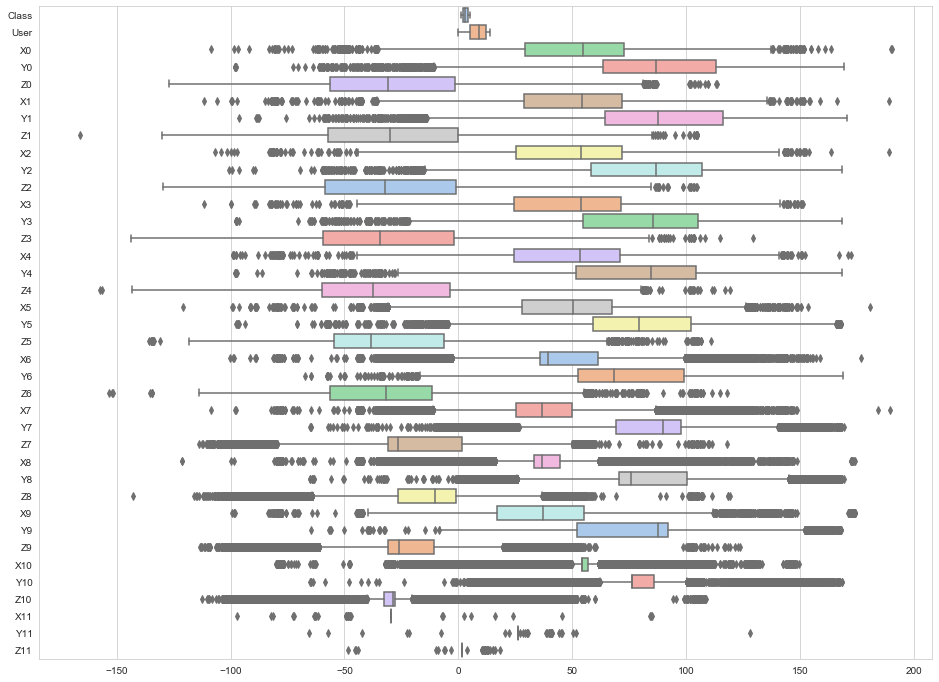

In [35]:
sns.set_style("whitegrid")
plt.subplots(figsize=(16, 12))
sns.boxplot(data=df1, orient='h', palette='pastel')
plt.show()

In [36]:
df1.drop(['X9','Y9','Z9','X10','Y10','Z10','X11','Y11','Z11'],axis=1,inplace=True)

In [37]:
df1.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,-52.682184,36.125151,52.537321,-56.444042,25.448563,97.622121,1.356154,33.041242,100.140647,-1.07738
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,-52.682184,36.125151,52.537321,-56.444042,25.448563,97.622121,1.356154,33.041242,100.140647,-1.07738
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,-52.682184,36.125151,52.537321,-56.444042,25.448563,97.622121,1.356154,33.041242,100.140647,-1.07738
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,-52.682184,36.125151,52.537321,-56.444042,25.448563,97.622121,1.356154,33.041242,100.140647,-1.07738
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,-52.682184,36.125151,52.537321,-56.444042,25.448563,97.622121,1.356154,33.041242,100.140647,-1.07738


In [38]:
df1.shape

(78095, 29)

In [39]:
df1['Class'] = df1['Class'].astype('category')

In [40]:
df1['Class'].value_counts()

3    16344
1    16265
5    15733
2    14978
4    14775
Name: Class, dtype: int64

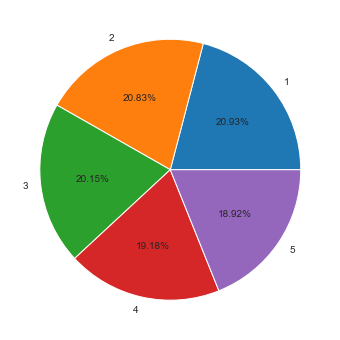

In [41]:
plt.figure(figsize=(8,6))
plt.pie(df1['Class'].value_counts(),labels=df1['Class'].unique(),autopct='%1.2f%%')
plt.show()

### For Class 1

In [42]:
dfc1 = df1[df1['Class'] == 1]

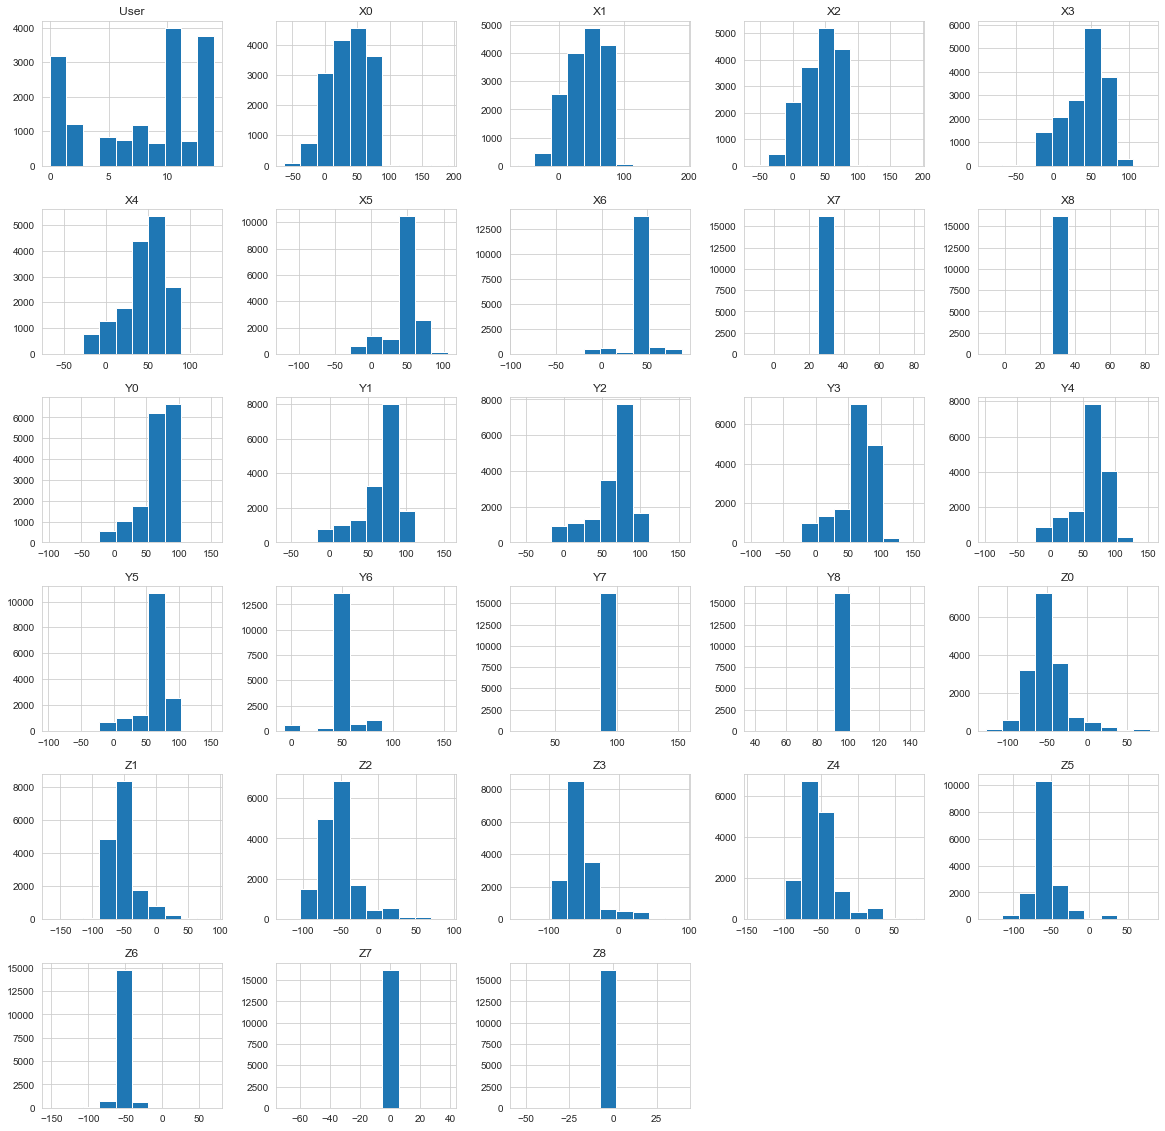

In [43]:
dfc1.hist(figsize=(20,20))
plt.show()

### For Class 2

In [44]:
dfc2 = df1[df1['Class'] == 2]

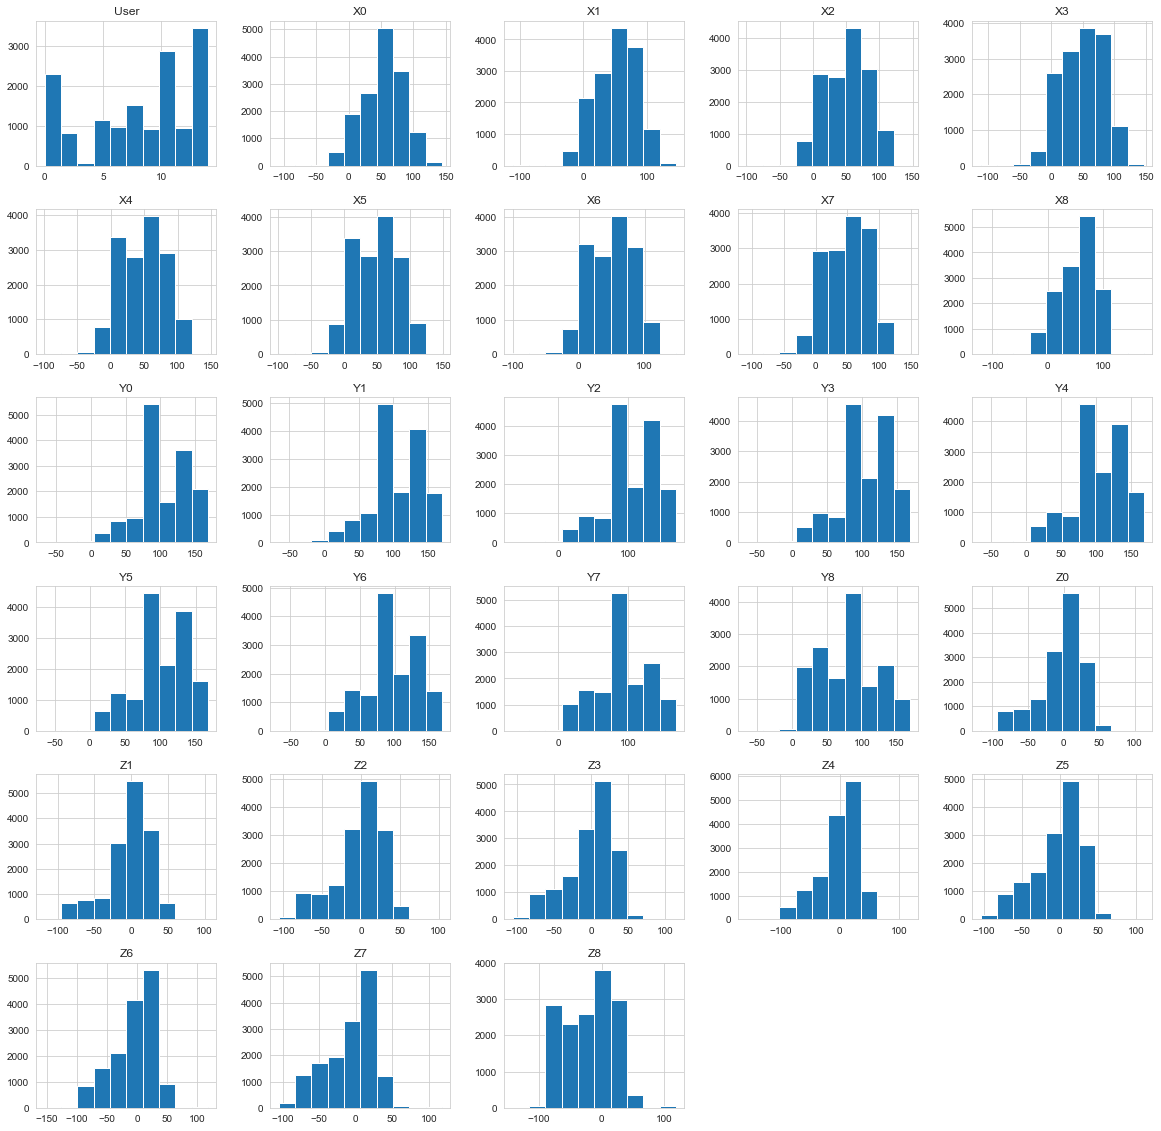

In [45]:
dfc2.hist(figsize=(20,20))
plt.show()

### For Class 3

In [46]:
dfc3 = df1[df1['Class'] == 3]

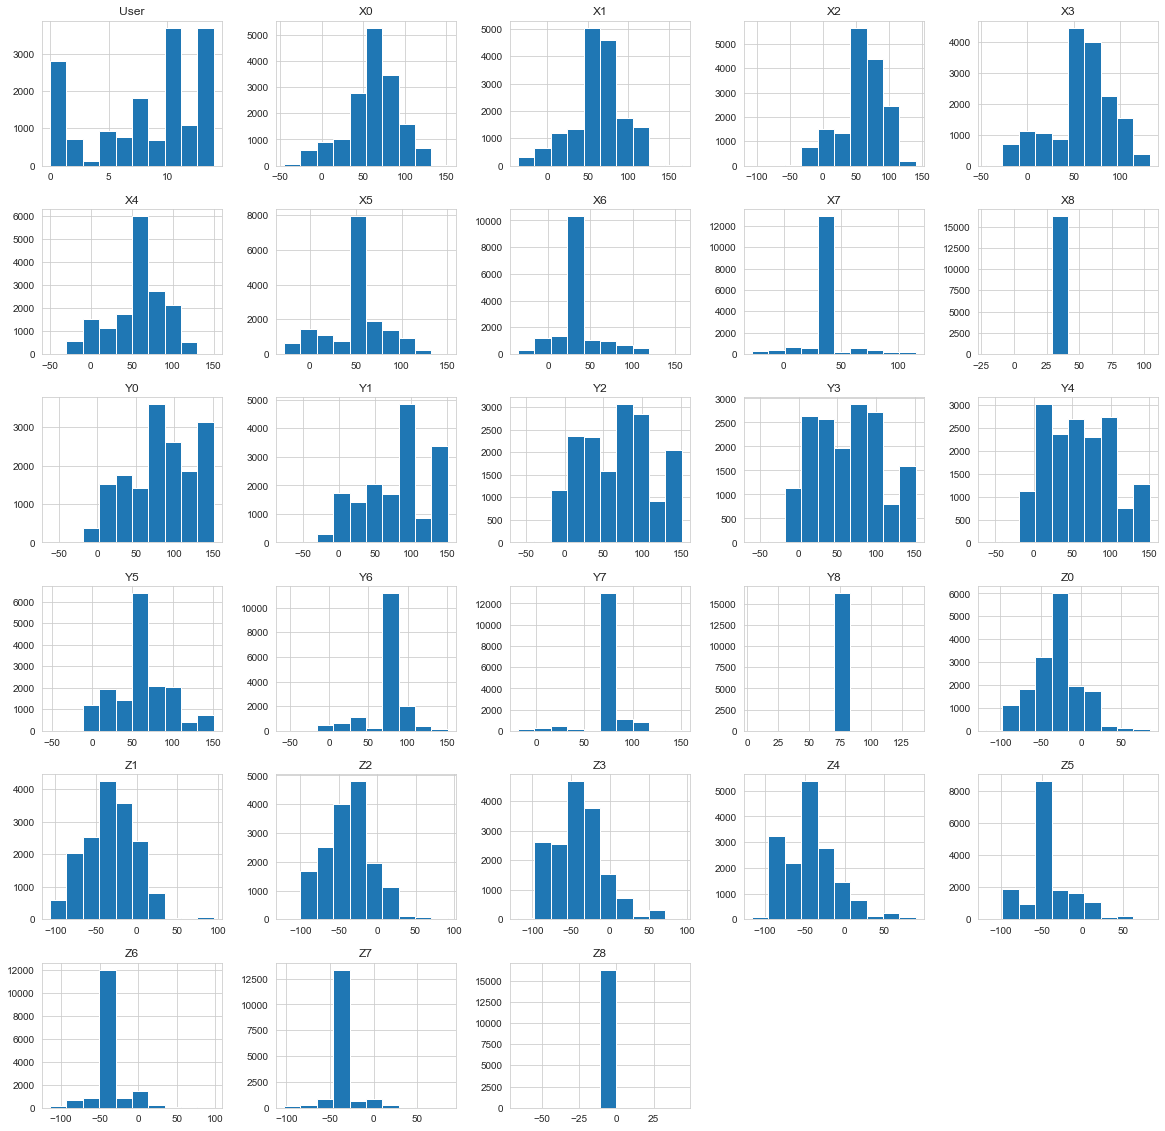

In [47]:
dfc3.hist(figsize=(20,20))
plt.show()

### For Class 4

In [48]:
dfc4 = df1[df1['Class'] == 4]

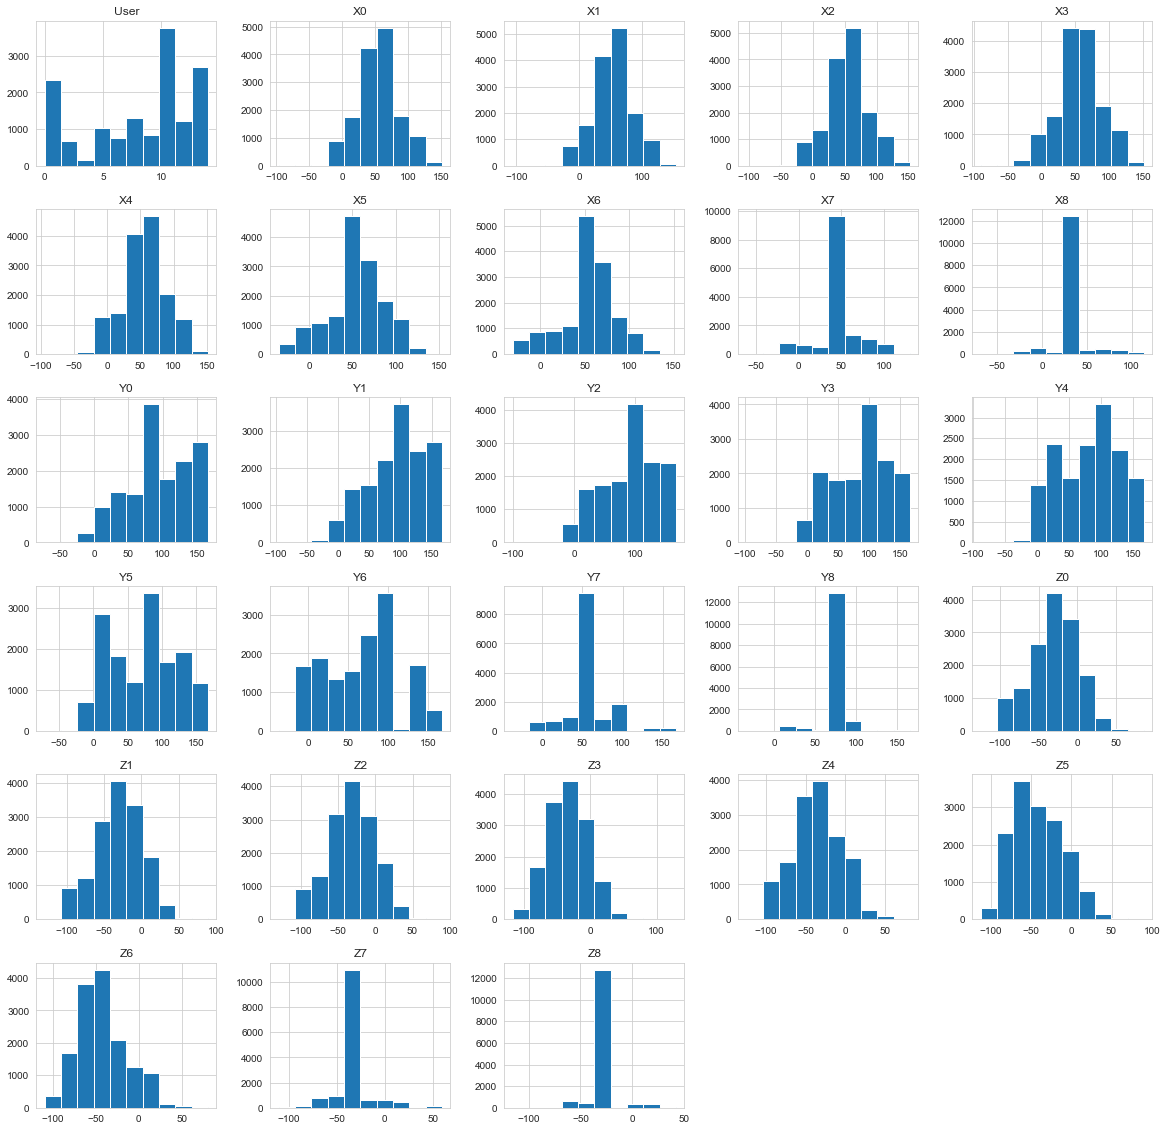

In [49]:
dfc4.hist(figsize=(20,20))
plt.show()

### For Class 5

In [50]:
dfc5 = df1[df1['Class'] == 5]

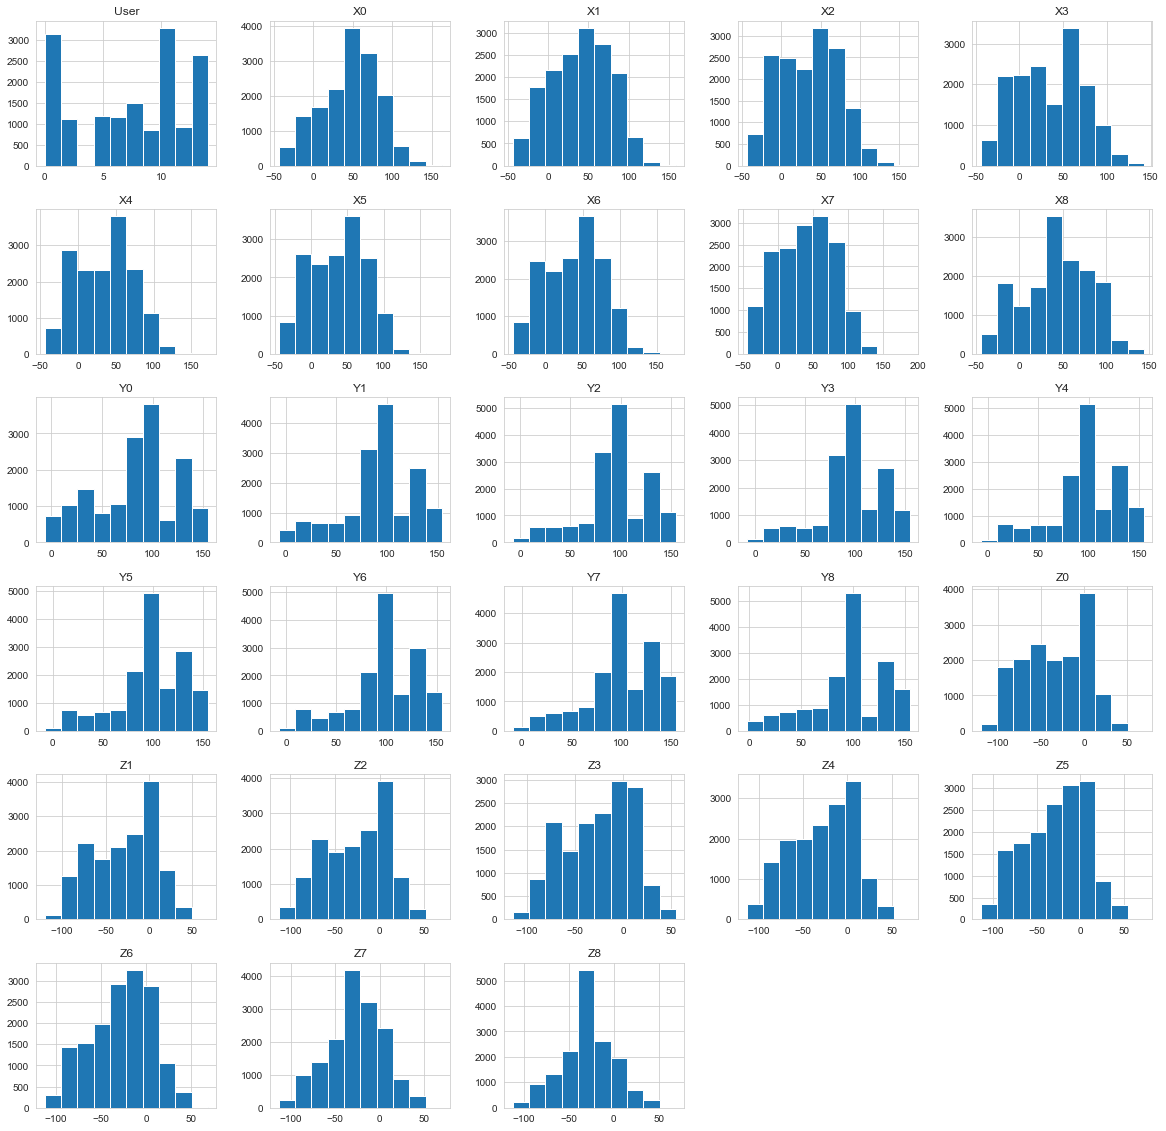

In [51]:
dfc5.hist(figsize=(20,20))
plt.show()

### Applying Base Algorithm

In [52]:
X = df1.drop(['Class','User'],axis=1)
y = df1['Class']

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 44)

### Decision Tree

In [55]:
%%time

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

y_pred = dt.predict(X_test) 

Wall time: 2.99 s


In [56]:
print("Train Accuracy :", dt.score(X_train, y_train)*100)
print("Test Accuracy :", dt.score(X_test, y_test)*100)

Train Accuracy : 100.0
Test Accuracy : 96.96956762986044


In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [58]:
n_folds = 10
parameters = {'criterion':['entropy','gini'],
              'max_depth':range(4,40,4),
              'min_samples_leaf':range(50,150,50),
              'min_samples_split':range(50,150,50)}

In [59]:
%%time

dtree = DecisionTreeClassifier(random_state=44)

RSCV = RandomizedSearchCV(estimator=dtree, param_distributions=parameters, cv=n_folds)

RSCV.fit(X_train,y_train)

print(RSCV.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=16,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=44, splitter='best')
Wall time: 2min 13s


In [60]:
%%time

dtree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=20,
                              min_samples_leaf=50,
                              min_samples_split=100,
                              random_state=44)

dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)

Wall time: 2.04 s


In [61]:
print("Train Accuracy :", dtree.score(X_train, y_train)*100)
print("Test Accuracy :", dtree.score(X_test, y_test)*100)

Train Accuracy : 95.3975048476201
Test Accuracy : 94.89521533142687


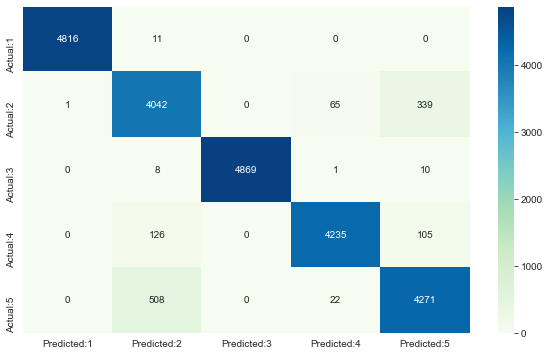

In [62]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(data=cm,
                  columns=['Predicted:1','Predicted:2','Predicted:3','Predicted:4','Predicted:5'],
                  index=['Actual:1','Actual:2','Actual:3','Actual:4','Actual:5'])
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True,fmt='d',cmap="GnBu")
plt.show()

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4827
           2       0.86      0.91      0.88      4447
           3       1.00      1.00      1.00      4888
           4       0.98      0.95      0.96      4466
           5       0.90      0.89      0.90      4801

    accuracy                           0.95     23429
   macro avg       0.95      0.95      0.95     23429
weighted avg       0.95      0.95      0.95     23429



In [64]:
%%time
c = cross_val_score(dtree,X_train,y_train)
print('Variance error :',np.std(c))
print('Bias error :',1-np.mean(c))

Variance error : 0.0029591684628154278
Bias error : 0.0630009896548378
Wall time: 3.65 s


### K-nearest neighbours

In [65]:
%%time

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Wall time: 1min 10s


In [66]:
print("Train Accuracy :", knn.score(X_train, y_train)*100)
print("Test Accuracy :", knn.score(X_test, y_test)*100)

Train Accuracy : 95.49262795887755
Test Accuracy : 92.7226940970592


In [67]:
%%time

params = {'n_neighbors':range(1,5),
         'p':[1,2],
         'weights':['uniform','distance'],
         'algorithm':['ball_tree','kd_tree','brute'],
         'leaf_size':range(10,50,10)}

knn = KNeighborsClassifier()

RSCV = RandomizedSearchCV(knn, params, cv=n_folds)

RSCV.fit(X_train, y_train)

print(RSCV.best_params_)

{'weights': 'distance', 'p': 1, 'n_neighbors': 2, 'leaf_size': 20, 'algorithm': 'ball_tree'}
Wall time: 22min 44s


In [68]:
%%time

knn = KNeighborsClassifier(weights= 'distance',
                           p= 1,
                           n_neighbors= 1,
                           leaf_size= 10,
                           algorithm= 'ball_tree')

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

Wall time: 1min 16s


In [69]:
print("Train Accuracy :", knn.score(X_train, y_train)*100)
print("Test Accuracy :", knn.score(X_test, y_test)*100)

Train Accuracy : 100.0
Test Accuracy : 97.3878526612318


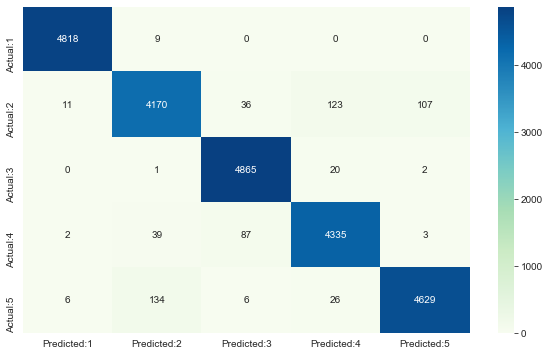

In [70]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(data=cm,
                  columns=['Predicted:1','Predicted:2','Predicted:3','Predicted:4','Predicted:5'],
                  index=['Actual:1','Actual:2','Actual:3','Actual:4','Actual:5'])
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True,fmt='d',cmap="GnBu")
plt.show()

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4827
           2       0.96      0.94      0.95      4447
           3       0.97      1.00      0.98      4888
           4       0.96      0.97      0.97      4466
           5       0.98      0.96      0.97      4801

    accuracy                           0.97     23429
   macro avg       0.97      0.97      0.97     23429
weighted avg       0.97      0.97      0.97     23429



In [72]:
%%time
c = cross_val_score(knn,X_train,y_train)
print('Variance error :',np.std(c))
print('Bias error :',1-np.mean(c))

Variance error : 0.0002886552943821559
Bias error : 0.03225036745524046
Wall time: 2min 7s


#### Random Forest Classifier

In [73]:
%%time

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=44)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

Wall time: 2.5 s


In [74]:
print("Train Accuracy :", rfc.score(X_train, y_train)*100)
print("Test Accuracy :", rfc.score(X_test, y_test)*100)

Train Accuracy : 99.95792631617458
Test Accuracy : 97.93845234538394


In [75]:
%%time

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = RandomizedSearchCV(rfc, cv = 10,param_distributions=param_dist, n_jobs = 3)

cv_rf.fit(X_train,y_train)

cv_rf.best_params_

Wall time: 1min 3s


{'max_features': 'auto',
 'max_depth': 4,
 'criterion': 'gini',
 'bootstrap': True}

In [76]:
%%time

rfc = RandomForestClassifier(bootstrap=False,
                            criterion='gini',
                            max_depth=4,
                            max_features='log2',
                            random_state=44)

rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

Wall time: 1.1 s


In [77]:
print("Train Accuracy :", rfc.score(X_train, y_train)*100)
print("Test Accuracy :", rfc.score(X_test, y_test)*100)

Train Accuracy : 89.05535433358943
Test Accuracy : 88.84288702035938


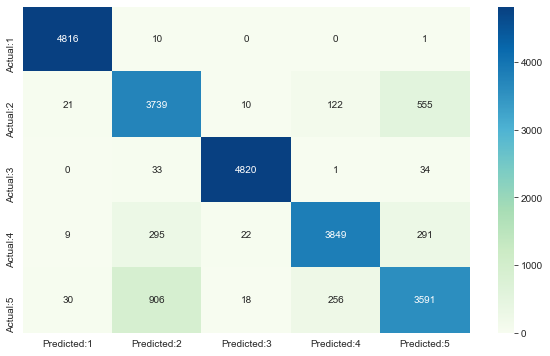

In [78]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(data=cm,
                  columns=['Predicted:1','Predicted:2','Predicted:3','Predicted:4','Predicted:5'],
                  index=['Actual:1','Actual:2','Actual:3','Actual:4','Actual:5'])
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True,fmt='d',cmap="GnBu")
plt.show()

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99      4827
           2       0.75      0.84      0.79      4447
           3       0.99      0.99      0.99      4888
           4       0.91      0.86      0.89      4466
           5       0.80      0.75      0.77      4801

    accuracy                           0.89     23429
   macro avg       0.89      0.89      0.89     23429
weighted avg       0.89      0.89      0.89     23429



In [80]:
%%time
c = cross_val_score(rfc,X_train,y_train)
print('Variance error :',np.std(c))
print('Bias error :',1-np.mean(c))

Variance error : 0.004073039615338674
Bias error : 0.10891578254395273
Wall time: 2.12 s


#### XGBoost Classifier

In [81]:
%%time

from xgboost.sklearn import XGBClassifier

xgbc = XGBClassifier(random_state=44)

xgbc.fit(X_train, y_train)

y_pred = xgbc.predict(X_test)

Wall time: 1min 6s


In [82]:
print("Train Accuracy :", xgbc.score(X_train, y_train)*100)
print("Test Accuracy :", xgbc.score(X_test, y_test)*100)

Train Accuracy : 97.80302198807303
Test Accuracy : 97.4860215971659


In [83]:
%%time

param_dist = {'n_estimators':range(50,150,50),
              'max_depth':range(1,5)}

xgbc = XGBClassifier(random_state=44)

cv_rf = RandomizedSearchCV(xgbc, cv = 10,param_distributions=param_dist, n_jobs =-1)

cv_rf.fit(X_train,y_train)

cv_rf.best_params_

Wall time: 21min 31s


{'n_estimators': 100, 'max_depth': 4}

In [84]:
%%time

xgbc = XGBClassifier(n_estimators=100,
                             max_depth=4,
                            random_state=44)

xgbc.fit(X_train,y_train)

y_pred = xgbc.predict(X_test)

Wall time: 1min 35s


In [85]:
print("Train Accuracy :", xgbc.score(X_train, y_train)*100)
print("Test Accuracy :", xgbc.score(X_test, y_test)*100)

Train Accuracy : 98.90791351114038
Test Accuracy : 98.4549063126894


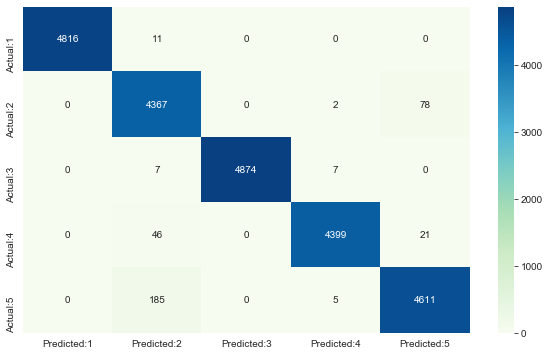

In [86]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(data=cm,
                  columns=['Predicted:1','Predicted:2','Predicted:3','Predicted:4','Predicted:5'],
                  index=['Actual:1','Actual:2','Actual:3','Actual:4','Actual:5'])
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True,fmt='d',cmap="GnBu")
plt.show()

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4827
           2       0.95      0.98      0.96      4447
           3       1.00      1.00      1.00      4888
           4       1.00      0.98      0.99      4466
           5       0.98      0.96      0.97      4801

    accuracy                           0.98     23429
   macro avg       0.98      0.98      0.98     23429
weighted avg       0.98      0.98      0.98     23429



In [88]:
%%time
c = cross_val_score(xgbc,X_train,y_train)
print('Variance error :',np.std(c))
print('Bias error :',1-np.mean(c))

Variance error : 0.00013370534954559236
Bias error : 0.016353852081209097
Wall time: 3min 6s


## Conclusion

*As per our dataset, we used various classification models in order to find the best result in terms of accuracy and prediction. We found that Boosting classification model i.e. XGBOOST is providing the better result in comparison to other models such as Decision Tree, Random Forest and KNN.*